# Analysis of Bias and Variance in a linear regression model
In this notebook, using a salary prediction dataset called salary prediction dataset https://www.kaggle.com/datasets/rkiattisak/salaly-prediction-for-beginer 
,we will analyze the bias and prediction using different features of the dataset

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder

In [2]:
# Read the data

salary_data = pd.read_csv("data/Salary Data.csv")

In [3]:
salary_data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
# Check for missing values
salary_data.isnull().sum().sum()

12

In [5]:
# Drop any rows that have missing values
salary_data = salary_data.dropna()
salary_data.isnull().sum().sum()

0

### We want to build a model that can predict salary based on the following features:
- Age
- Educational Level
- Years of Experience
- Gender
- Job Title

In [6]:
features = ['Age', 'Gender', 'Education Level', 'Years of Experience', 'Job Title', 'Salary']
salary_data = salary_data[features]
salary_data.head()

,Age,Gender,Education Level,Years of Experience,Job Title,Salary
0,32.0,Male,Bachelor's,5.0,Software Engineer,90000.0
1,28.0,Female,Master's,3.0,Data Analyst,65000.0
2,45.0,Male,PhD,15.0,Senior Manager,150000.0
3,36.0,Female,Bachelor's,7.0,Sales Associate,60000.0
4,52.0,Male,Master's,20.0,Director,200000.0


### Let's examine the categorical columns

In [7]:
print(salary_data['Gender'].unique())
print(salary_data['Education Level'].unique())
print(salary_data['Job Title'])

['Male' 'Female']
["Bachelor's" "Master's" 'PhD']
0                  Software Engineer
1                       Data Analyst
2                     Senior Manager
3                    Sales Associate
4                           Director
                   ...              
370         Senior Marketing Analyst
371           Director of Operations
372           Junior Project Manager
373    Senior Operations Coordinator
374          Senior Business Analyst
Name: Job Title, Length: 373, dtype: object


### We will use LabelEncoder to conver Categorical values to numeric

In [8]:
def Encoder (df):
    columnsToEncode = list(df.select_dtypes(include = ['category', 'object']))
    le = LabelEncoder()
    for feature in columnsToEncode:
        try:
            df[feature] = le.fit_transform(df[feature])
        except:
            print('Error encoding '+feature)
    return df

In [9]:
categorical_features = ['Gender', 'Education Level', 'Job Title']
salary_data = Encoder(salary_data)
salary_data.head()

,Age,Gender,Education Level,Years of Experience,Job Title,Salary
0,32.0,1,0,5.0,159,90000.0
1,28.0,0,1,3.0,17,65000.0
2,45.0,1,2,15.0,130,150000.0
3,36.0,0,0,7.0,101,60000.0
4,52.0,1,1,20.0,22,200000.0


## Regression Model
### 1. Let's try with only one feature (input), for example years of experience 

In [10]:
df_binary = salary_data[['Years of Experience', 'Salary']]

### 1.1 Explore the data

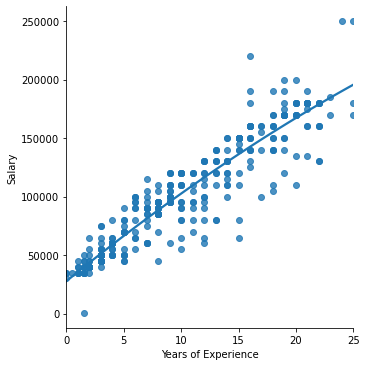

In [11]:
sns.lmplot(x = 'Years of Experience', y='Salary', data = df_binary, order = 2, ci = None)
plt.show()

### 1.2 Train our model

In [12]:
# Separate data into indpendent (X) and dependent variables 
# Convert the data frame into a numpy array since each dataframe contains only one column
X = np.array(df_binary['Years of Experience']).reshape(-1,1)
y = np.array(df_binary['Salary']).reshape(-1,1) 

In [13]:
# Define a function to split the data
def prepare_train_cv_test (X, y):
    
    # get 60% of the dataset as the training set.  Put the remaining 40% in temporary variables
    X_train, X_, y_train, y_ = train_test_split(X, y, test_size = 0.40, random_state = 55)

    # Split the 40% subset above into two: one half for cross validation and the other for the test set
    X_cv, X_test, y_cv, y_test = train_test_split(X_, y_,  test_size = .50, random_state = 55)
    
    return X_train, y_train, X_cv, y_cv, X_test, y_test

In [14]:
X_train, y_train, X_cv, y_cv, X_test, y_test = prepare_train_cv_test(X, y) 

In [15]:
model= LinearRegression()
model.fit(X_train, y_train)
print(f" Model score: {model.score(X_cv, y_cv )}")

 Model score: 0.8793582298357452


### 1.3 Exlore the results

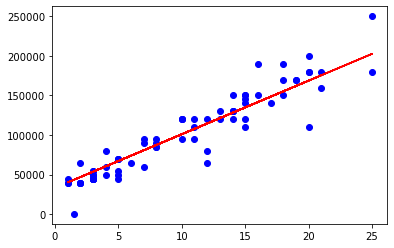

In [16]:
y_pred_cv = model.predict(X_cv)
y_pred_train = model.predict(X_train)
plt.scatter(X_cv, y_cv, color = 'b')
plt.plot(X_cv, y_pred_cv, color ='r')

In [17]:
train_mse = mean_squared_error(y_train, y_pred_train)
cv_mse = mean_squared_error(y_cv, y_pred_cv) 
print(f"Training MSE : {train_mse:.0f}")
print(f"Cross Validation MSE: {cv_mse: .0f}")

Training MSE : 306379946
Cross Validation MSE:  322126385


#### The results show that the both training and Cross Validation Errors are high. This maybe due to high bias (underfit). We could one or more of the following:

- Try adding additional features
- Try decreasing the regulatiztion parameter
- Try adding polynomial features

We will try the first option


### 2.1 Let's try adding more features, age, gender

In [18]:
X = salary_data[['Age', 'Years of Experience', 'Gender', 'Job Title']]
y = salary_data['Salary']

### We will now split the data into train, cross validation, and test sets

In [19]:
# Define a function to split the data
def prepare_train_cv_test (X, y):
    
    # get 60% of the dataset as the training set.  Put the remaining 40% in temporary variables
    X_train, X_, y_train, y_ = train_test_split(X, y, test_size = 0.40, random_state = 55)

    # Split the 40% subset above into two: one half for cross validation and the other for the test set
    X_cv, X_test, y_cv, y_test = train_test_split(X_, y_,  test_size = .50, random_state = 55)
    
    return X_train, y_train, X_cv, y_cv, X_test, y_test

In [20]:
X_train, y_train, X_cv, y_cv, X_test, y_test = prepare_train_cv_test (X, y)

In [21]:
print(f" Training Data shape: {X_train.shape}")
print(f" Cross Validation Data shape: {X_cv.shape}")
print(f" Test Data shape: {X_test.shape}")

 Training Data shape: (223, 4)
 Cross Validation Data shape: (75, 4)
 Test Data shape: (75, 4)


In [22]:
# The data has different range of values, for example age and years of experience have a large range than 
# Gender and Educational Level.  We want to scale the data into new values that are easier to compare
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_cv_scaled = scale.fit_transform(X_cv)
X_test_scaled = scale.fit_transform(X_test)

###  2.2 Train our model

In [23]:
model.fit(X_train_scaled, y_train)
print(f" Model score: {model.score(X_cv_scaled, y_cv )}")

 Model score: 0.8798624465213079


The accuracy got better

### 2.3 Explore the results

In [24]:
y_pred_cv = model.predict(X_cv_scaled)
y_pred_train = model.predict(X_train_scaled)
train_mse = mean_squared_error(y_train, y_pred_train) /2
cv_mse = mean_squared_error(y_cv, y_pred_cv) /2
print(f"Training MSE : {train_mse:.0f}")
print(f"Cross Validation MSE: {cv_mse: .0f}")

Training MSE : 139485760
Cross Validation MSE:  160390037


The model is performing better.  Both training and Cross Validation MSE were decreased.  Can we improve it furthere?

### 3.1 Let's try addition polynomial features

In [25]:
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_mapped = poly.fit_transform(X_train)
X_cv_mapped = poly.fit_transform(X_cv)
X_test_mapped = poly.fit_transform(X_test)

In [26]:
X_train_mapped_scaled = scale.fit_transform(X_train_mapped)
X_cv_mapped_scaled = scale.fit_transform(X_cv_mapped)
X_test_mapped_scaled = scale.fit_transform(X_test_mapped)

###  3.2 Train our model

In [27]:
model.fit(X_train_mapped_scaled, y_train)
print(f" Model score: {model.score(X_cv_mapped_scaled, y_cv )}")

 Model score: 0.9081508644503451


### 3.3 Explore the results

In [28]:
y_pred_cv = model.predict(X_cv_mapped_scaled)
y_pred_train = model.predict(X_train_mapped_scaled)
train_mse = mean_squared_error(y_train, y_pred_train) /2
cv_mse = mean_squared_error(y_cv, y_pred_cv) /2
print(f"Training MSE : {train_mse:.0f}")
print(f"Cross Validation MSE: {cv_mse: .0f}")

Training MSE : 106554637
Cross Validation MSE:  122623491


The model is performing even better.  Both training and Cross Validation MSE were decreased.

### 4.1 Let's try various degrees of polynomial to see if our model gets more accurate

In [29]:
def train_plot_poly(model, x_train, y_train, x_cv, y_cv, max_degree=10, baseline=None):
    
    train_mses = []
    cv_mses = []
    models = []
    scalers = []
    degrees = range(1,max_degree+1)

    # Loop over 10 times. Each adding one more degree of polynomial higher than the last.
    for degree in degrees:

        # Add polynomial features to the training set
        poly = PolynomialFeatures(degree, include_bias=False)
        X_train_mapped = poly.fit_transform(x_train)

        # Scale the training set
        scaler_poly = StandardScaler()
        X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
        scalers.append(scaler_poly)

        # Create and train the model
        model.fit(X_train_mapped_scaled, y_train )
        models.append(model)

        # Compute the training MSE
        yhat = model.predict(X_train_mapped_scaled)
        train_mse = mean_squared_error(y_train, yhat) / 2
        print(f"Degree {degree} Train mse: {train_mse: .0f}")
        train_mses.append(train_mse)

        # Add polynomial features and scale the cross-validation set
        poly = PolynomialFeatures(degree, include_bias=False)
        X_cv_mapped = poly.fit_transform(x_cv)
        X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

        # Compute the cross-validation MSE
        yhat = model.predict(X_cv_mapped_scaled)
        cv_mse = mean_squared_error(y_cv, yhat) / 2
        print(f"Degree {degree} cv mse: {cv_mse: .0f}")
        cv_mses.append(cv_mse)

    # Plot the results
    plt.plot(degrees, train_mses, marker='o', c='r', label='training MSEs'); 
    plt.plot(degrees, cv_mses, marker='o', c='b', label='CV MSEs'); 
    plt.plot(degrees, np.repeat(baseline, len(degrees)), linestyle='--', label='baseline')
    plt.title("degree of polynomial vs. train and CV MSEs")
    plt.xticks(degrees)
    plt.xlabel("degree"); 
    plt.ylabel("MSE"); 
    plt.legend()
    plt.show()

In [30]:
X_train, y_train, X_cv, y_cv, X_test, y_test = prepare_train_cv_test (X, y)

In [31]:
print(f" Training Data shape: {X_train.shape}")
print(f" Cross Validation Data shape: {X_cv.shape}")
print(f" Test Data shape: {X_test.shape}")

 Training Data shape: (223, 4)
 Cross Validation Data shape: (75, 4)
 Test Data shape: (75, 4)


Degree 1 Train mse:  139485760
Degree 1 cv mse:  155796768
Degree 2 Train mse:  123112332
Degree 2 cv mse:  133162540
Degree 3 Train mse:  106554637
Degree 3 cv mse:  112663705
Degree 4 Train mse:  79387245
Degree 4 cv mse:  510623693
Degree 5 Train mse:  45146801
Degree 5 cv mse:  27681412896
Degree 6 Train mse:  17530809
Degree 6 cv mse:  56587878158
Degree 7 Train mse:  2419613
Degree 7 cv mse:  31419318883818520576
Degree 8 Train mse:  448430
Degree 8 cv mse:  16336526198127925248
Degree 9 Train mse:  448430
Degree 9 cv mse:  205517902703991424
Degree 10 Train mse:  448430
Degree 10 cv mse:  21502722051731048


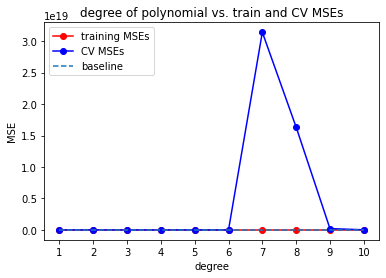

In [32]:
train_plot_poly(model, X_train, y_train, X_cv, y_cv, max_degree =10, baseline= 122122122)

Based on the above results polynomial of degree 3 seems to be best fit